## Import Library


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

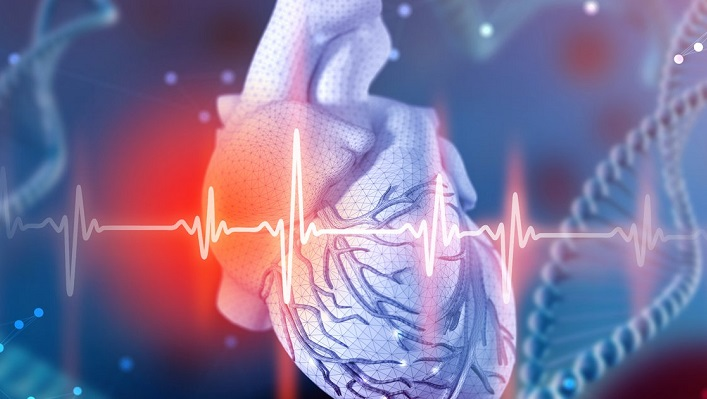

In [2]:
from PIL import Image
Image1 = Image.open("heart.jpg");
Image1

## Read the data

In [3]:
heart = pd.read_csv('heart.csv')

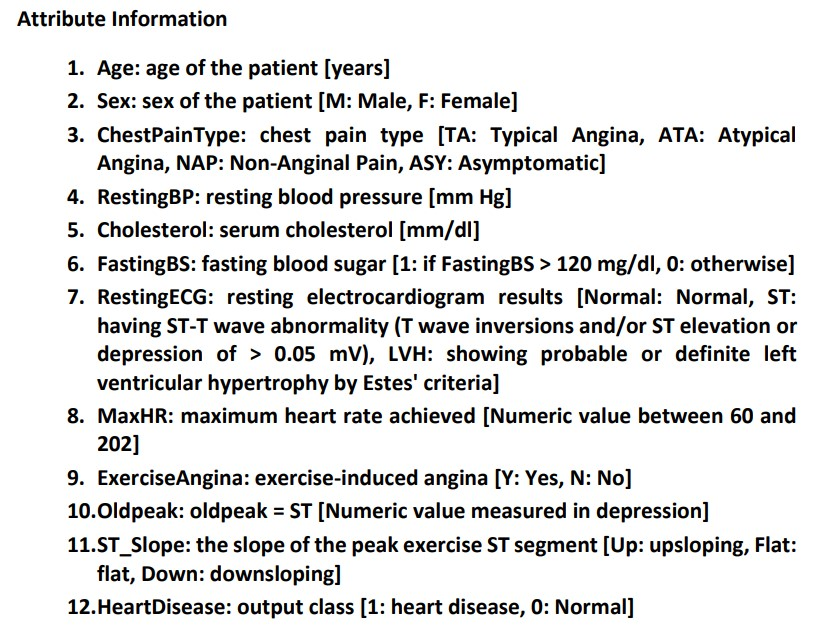

In [4]:
Image2 = Image.open("heart_1.jpg");
Image2

## Exploratory data analysis

In [5]:
#first 5 rows in the dataset
heart.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [6]:
#DataFrame's information
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
#finding how many rows and columns in the dataset
heart.shape

(918, 12)

In [8]:
#finding null values in the dataset
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Transforming the categorical columns

In [9]:
heart['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [10]:
heart['Sex'].unique()

array(['M', 'F'], dtype=object)

In [11]:
heart['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [12]:
heart['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [13]:
heart['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

### Data Visualization

In [14]:
import plotly.express as px
fig = px.pie(heart,names='HeartDisease',
            title='<b>Counts in HeartDisease</b>',
            hole = 0.4,template='plotly_dark',
            width=600,height=400)
fig.show()

heart['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [15]:
fig = px.histogram(heart,"Sex",
                 color="HeartDisease", title="<b>Sex vs HeartDisease</b>",
                 template='plotly_dark',
                 width=500,height=300)

fig.show()

In [16]:
fig = px.histogram(data_frame = heart,
             x = "ChestPainType",
             color="HeartDisease", title="<b>ChestPainType vs HeartDisease</b>",
             template='plotly_dark', width=500,height=300)

fig.show()

In [17]:
fig = px.histogram(data_frame = heart,
             x = "RestingECG",
             color="HeartDisease", title="<b>RestingECG vs HeartDisease</b>",
             template='plotly_dark', width=500,height=300)

fig.show()

In [18]:
fig = px.histogram(data_frame = heart,
             x = "ExerciseAngina",
             color="HeartDisease", title="<b>ExerciseAngina vs HeartDisease</b>",
             template='plotly_dark', width=500,height=300)

fig.show()

In [19]:
fig = px.histogram(data_frame = heart,
             x = "ST_Slope",
             color="HeartDisease", title="<b>ST_Slope vs HeartDisease</b>",
             template='plotly_dark', width=500,height=300)

fig.show()

In [20]:
fig = px.histogram(heart,'Age',
                   color='HeartDisease',
                   title="<b> Age vs HeartDisease </b>")

fig.show()

#### Handling categorical columns

In [21]:
encode = LabelEncoder()
columns = ["Sex", "ExerciseAngina", "RestingECG", "ST_Slope", "ChestPainType"]
for i in columns:
    heart[i] = encode.fit_transform(heart[i])

In [22]:
heart

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[918 rows x 12 columns]

In [23]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [24]:
heart.describe()

Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.510893    0.789760       0.781046  132.396514   198.799564   
std      9.432617    0.407701       0.956519   18.514154   109.384145   
min     28.000000    0.000000       0.000000    0.000000     0.000000   
25%     47.000000    1.000000       0.000000  120.000000   173.250000   
50%     54.000000    1.000000       0.000000  130.000000   223.000000   
75%     60.000000    1.000000       2.000000  140.000000   267.000000   
max     77.000000    1.000000       3.000000  200.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    0.989107  136.809368        0.404139    0.887364   
std      0.423046    0.631671   25.460334        0.490992    1.066570   
min      0.000000    0.000000   60.000000        0.000000   -2.600000   
25%      0.000000    1.000000  120.000000        0.000000    0.000000   
50%      0.000000    1.000000  138.000000        0.000000    0.600000   
75%      0.000000    1.000000  156.000000        1.000000    1.500000   
max      1.000000    2.000000  202.000000        1.000000    6.200000   

         ST_Slope  HeartDisease  
count  918.000000    918.000000  
mean     1.361656      0.553377  
std      0.607056      0.497414  
min      0.000000      0.000000  
25%      1.000000      0.000000  
50%      1.000000      1.000000  
75%      2.000000      1.000000  
max      2.000000      1.000000

In [25]:
# finding the relationship between the categories
corr = heart.corr()                             
corr.style.background_gradient(cmap = 'Blues')

## Apply the machine learning models:

In [26]:
X = heart.drop("HeartDisease", axis=1)
y = heart["HeartDisease"]

#### logistic Regression

In [27]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predicting the Test set results 
y_pred_log  =  clf.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
ac = accuracy_score(y_test,y_pred_log)
prec=precision_score(y_test,y_pred_log)
recall=recall_score(y_test,y_pred_log)
f1=f1_score(y_test,y_pred_log)

# Evaluate the results
print('Confusion Matrix',cm)
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

Confusion Matrix [[65 17]
 [12 90]]
accuracy 0.842391304347826
precision 0.8411214953271028
recallscore 0.8823529411764706
f1score 0.861244019138756


C:\Users\srmis\.conda\envs\DAB300\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



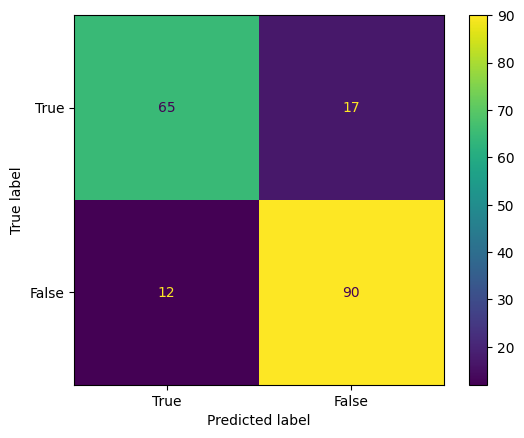

In [28]:
from sklearn import metrics
ConfusionMatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False]).plot()
plt.show()

#### Naive Bayes Model

In [29]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)


# Predicting the Test set results 
y_pred_gnb  =  gnb.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gnb)
ac = accuracy_score(y_test,y_pred_gnb)
prec=precision_score(y_test,y_pred_gnb)
recall=recall_score(y_test,y_pred_gnb)
f1=f1_score(y_test,y_pred_gnb)

# Evaluate the results
print('Confusion Matrix',cm)
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

Confusion Matrix [[63 19]
 [14 88]]
accuracy 0.8206521739130435
precision 0.822429906542056
recallscore 0.8627450980392157
f1score 0.8421052631578947


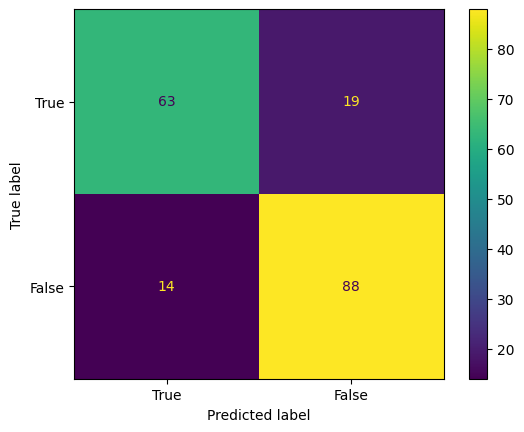

In [30]:
from sklearn import metrics
ConfusionMatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False]).plot()
plt.show()

#### KNN Model

In [31]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
KNN =  KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train,y_train)

# Predicting the Test set results 
y_pred_knn  =  KNN.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
ac = accuracy_score(y_test,y_pred_knn)
prec=precision_score(y_test,y_pred_knn)
recall=recall_score(y_test,y_pred_knn)
f1=f1_score(y_test,y_pred_knn)

# Evaluate the results
print('Confusion Matrix',cm)
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

Confusion Matrix [[57 25]
 [34 68]]
accuracy 0.6793478260869565
precision 0.7311827956989247
recallscore 0.6666666666666666
f1score 0.6974358974358974


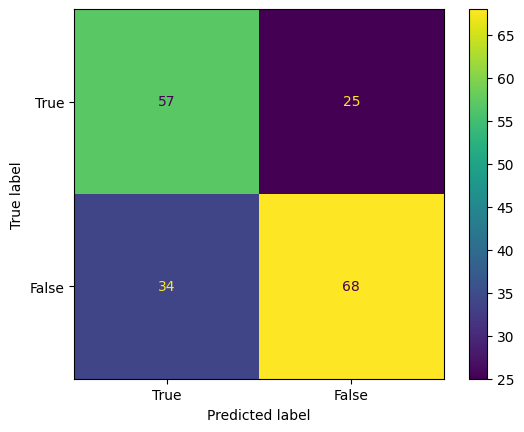

In [32]:
from sklearn import metrics
ConfusionMatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False]).plot()
plt.show()

#### Support Vector Machine SVM Model

In [33]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
svm = svm.SVC(decision_function_shape='ovo')
svm.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = svm.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

# Evaluate the results
print('Confusion Matrix',cm)
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

Confusion Matrix [[54 28]
 [27 75]]
accuracy 0.7010869565217391
precision 0.7281553398058253
recallscore 0.7352941176470589
f1score 0.7317073170731707


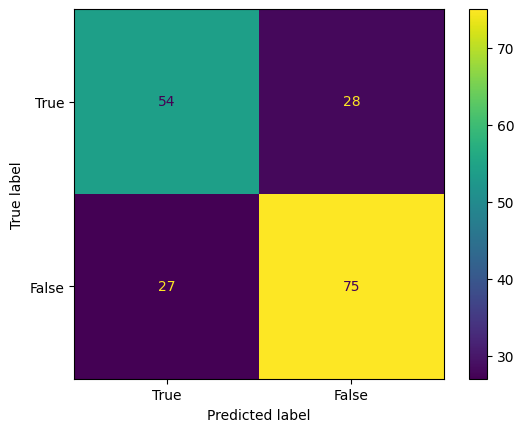

In [34]:
from sklearn import metrics
ConfusionMatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False]).plot()
plt.show()

#### Decision Tree Classification Model


In [35]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
clf = DecisionTreeClassifier(random_state=94)
clf.fit(X_train, y_train)

# Predicting the Test set results 
y_pred_clf = clf.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_clf)
ac = accuracy_score(y_test,y_pred_clf)
prec=precision_score(y_test,y_pred_clf)
recall=recall_score(y_test,y_pred_clf)
f1=f1_score(y_test,y_pred_clf)

# Evaluate the results
print('Confusion Matrix',cm)
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

Confusion Matrix [[62 20]
 [22 80]]
accuracy 0.7717391304347826
precision 0.8
recallscore 0.7843137254901961
f1score 0.792079207920792


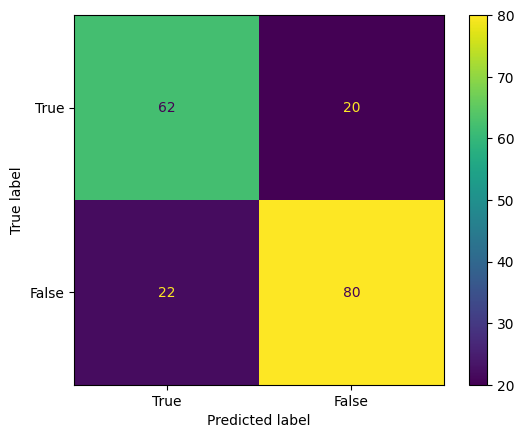

In [36]:
from sklearn import metrics
ConfusionMatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False]).plot()
plt.show()

#### Random Forest Model

In [37]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
rfm = RandomForestClassifier(random_state=1)
rfm.fit(X_train, y_train)


# Predicting the Test set results 
y_pred_rfm = rfm.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfm)
ac = accuracy_score(y_test,y_pred_rfm)
prec=precision_score(y_test,y_pred_rfm)
recall=recall_score(y_test,y_pred_rfm)
f1=f1_score(y_test,y_pred_rfm)

# Evaluate the results
print('Confusion Matrix',cm)
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

Confusion Matrix [[62 20]
 [11 91]]
accuracy 0.8315217391304348
precision 0.8198198198198198
recallscore 0.8921568627450981
f1score 0.8544600938967136


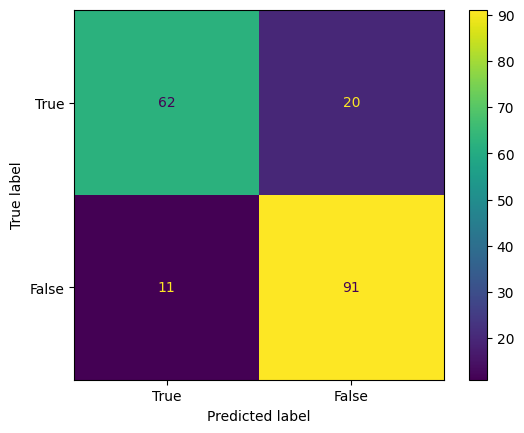

In [38]:
from sklearn import metrics
ConfusionMatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False]).plot()
plt.show()

## Compare the models

| Name of the model| Accuracy | Precision | Recall | F1-Score |
| :-  | :-  | :- | :- | :- |
|Logistic regression| 0.842 | 0.841 | 0.882 | 0.861 |           
|Naive Bayes Model| 0.820 | 0.822 | 0.862 | 0.842 |
|KNN Model| 0.679 | 0.731 | 0.666 | 0.697 |
|Support Vector Machine SVM Model| 0.701 | 0.728 | 0.735 | 0.731 |
|Decision Tree Model| 0.771 | 0.8 | 0.784 | 0.792 |
|Random Forest Model| 0.831 | 0.819 | 0.892 | 0.854 |

## Conclusion:


- Overall we can conclude from the given data that the ratio of the heart diseases is higher in Male ie. 55%. For the chest pain patient with ASY type pain has the highest ratio of heart disease with 400 counts. Measuring the heart disease of normal patient has equal chance of having heart disease and for the rest the ratio is 1:10. For ST_Slope if the slope is up there are very low chance of having heart problems whereas for flat slope it is opposite. 
- It shows that there is no single feature that has a very high correlation with our target value. Also, some of the features have a negative correlation with the target value and some have positive.
- After performing Accuracy and Precision on every model, we can conclude that the Logistic Regression gives the best result out of all the model for the data accuracy test.

References:

- https://www.kaggle.com/code/temitayobadewole/heart-diseases-analysis-and-prediction

- https://plotly.com/python/templates/
